# 📘 Scenario-Based Advanced Internship Assignment

## 🔁 Introduction
This assignment contains real-world analytics problems using `pandas`, `numpy`, `matplotlib`, and `seaborn`. You are expected to write code for each scenario and explain your findings.

---
## 🔷 Scenario 1: Product Performance Analysis

### Problem Statement
Identify top contributing product categories and find underperformers despite high pricing.

### 🧠 Instructions:
1. Compute total revenue by `Item_Type`
2. Sort and calculate cumulative revenue %
3. Identify high MRP but low sales products

### ✍️ Your Task:

In [44]:
# TODO: Write code to analyze top contributors using Pareto principle
# and detect underperformers with high MRP but low sales

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
%matplotlib inline

# Load data
df = pd.read_csv('big_mart_sales.csv')
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [48]:
# Group sales by Item_Identifier
item_sales = df.groupby('Item_Identifier').agg({
    'Item_Outlet_Sales': 'sum',
    'Item_MRP': 'mean'
}).reset_index()

# Sort by sales descending
item_sales = item_sales.sort_values(by='Item_Outlet_Sales', ascending=False)

# Calculate cumulative sales percentage
item_sales['Cumulative_Sales_Pct'] = item_sales['Item_Outlet_Sales'].cumsum() / item_sales['Item_Outlet_Sales'].sum()

# Top contributors: items making up ~80% of sales
top_contributors = item_sales[item_sales['Cumulative_Sales_Pct'] <= 0.80]

# Underperformers: High MRP but Low Sales
# Define thresholds: top 25% MRP, bottom 25% sales
mrp_75 = item_sales['Item_MRP'].quantile(0.75)
sales_25 = item_sales['Item_Outlet_Sales'].quantile(0.25)

underperformers = item_sales[(item_sales['Item_MRP'] >= mrp_75) & (item_sales['Item_Outlet_Sales'] <= sales_25)]

top_contributors.shape[0], underperformers.shape[0], top_contributors.head(), underperformers.head()

(900,
 12,
      Item_Identifier  Item_Outlet_Sales  Item_MRP  Cumulative_Sales_Pct
 1210           FDY55         42661.8008  257.2738              0.002295
 156            FDA15         41584.5364  249.4967              0.004532
 1230           FDZ20         40185.0248  254.1106              0.006693
 359            FDF05         36555.7490  262.8910              0.008659
 148            FDA04         35741.4756  259.0087              0.010582,
      Item_Identifier  Item_Outlet_Sales  Item_MRP  Cumulative_Sales_Pct
 492            FDI36          5932.2780  198.3426              0.926947
 26             DRE01          5816.4288  241.8012              0.929792
 1001           FDU43          5720.5536  238.0064              0.931342
 1457           NCQ29          5206.5560  260.2278              0.943969
 409            FDG28          5145.3024  246.0144              0.944801)

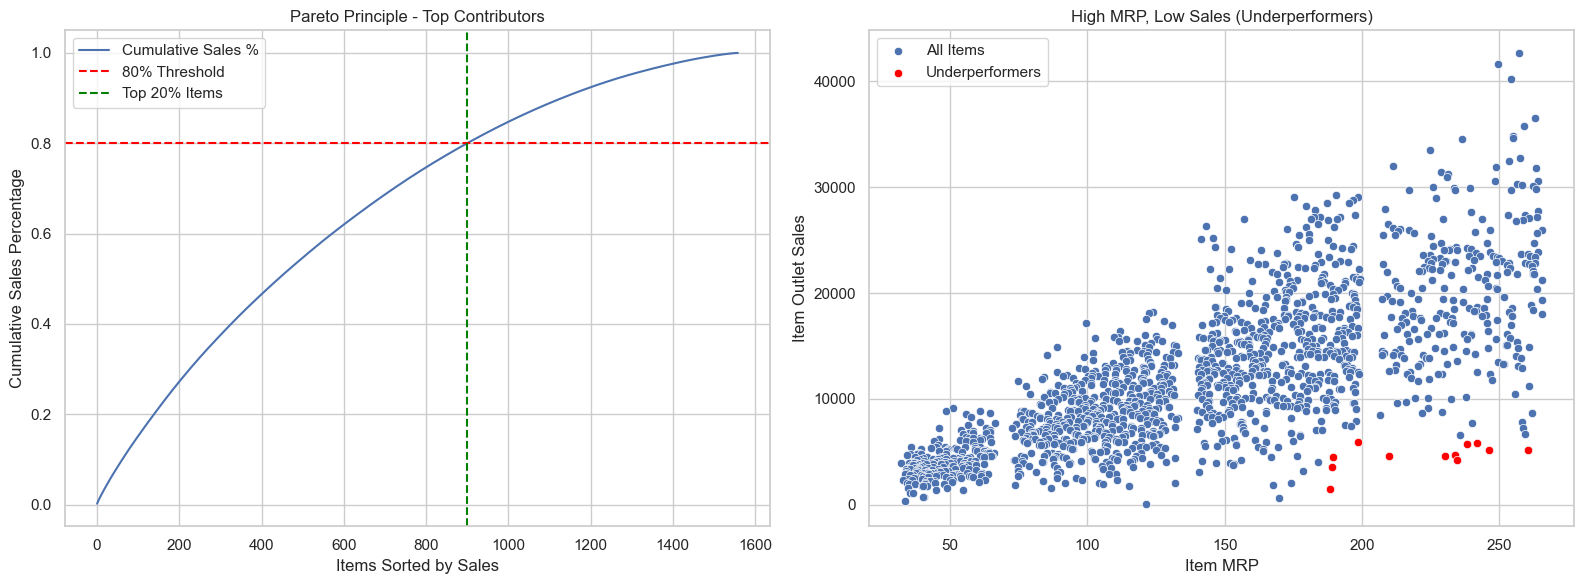

In [50]:
# Visualization
plt.figure(figsize=(16, 6))

# Pareto Principle Plot
plt.subplot(1, 2, 1)
sns.lineplot(data=item_sales, x=range(len(item_sales)), y='Cumulative_Sales_Pct', label='Cumulative Sales %')
plt.axhline(y=0.80, color='red', linestyle='--', label='80% Threshold')
plt.axvline(x=len(top_contributors), color='green', linestyle='--', label='Top 20% Items')
plt.title("Pareto Principle - Top Contributors")
plt.xlabel("Items Sorted by Sales")
plt.ylabel("Cumulative Sales Percentage")
plt.legend()

# Underperformers Scatter Plot
plt.subplot(1, 2, 2)
sns.scatterplot(data=item_sales, x='Item_MRP', y='Item_Outlet_Sales', label='All Items')
sns.scatterplot(data=underperformers, x='Item_MRP', y='Item_Outlet_Sales', color='red', label='Underperformers')
plt.title("High MRP, Low Sales (Underperformers)")
plt.xlabel("Item MRP")
plt.ylabel("Item Outlet Sales")
plt.legend()

plt.tight_layout()
plt.show()

---
## 🔷 Scenario 2: Seasonal Outlet Insights

### Problem Statement
Simulate monthly performance of outlets and visualize trends.

### 🧠 Instructions:
1. Add random `Month` column
2. Group by `Outlet_Identifier` and `Month`
3. Plot monthly sales trend

### ✍️ Your Task:

In [55]:
# TODO: Write code to simulate monthly sales trend per outlet

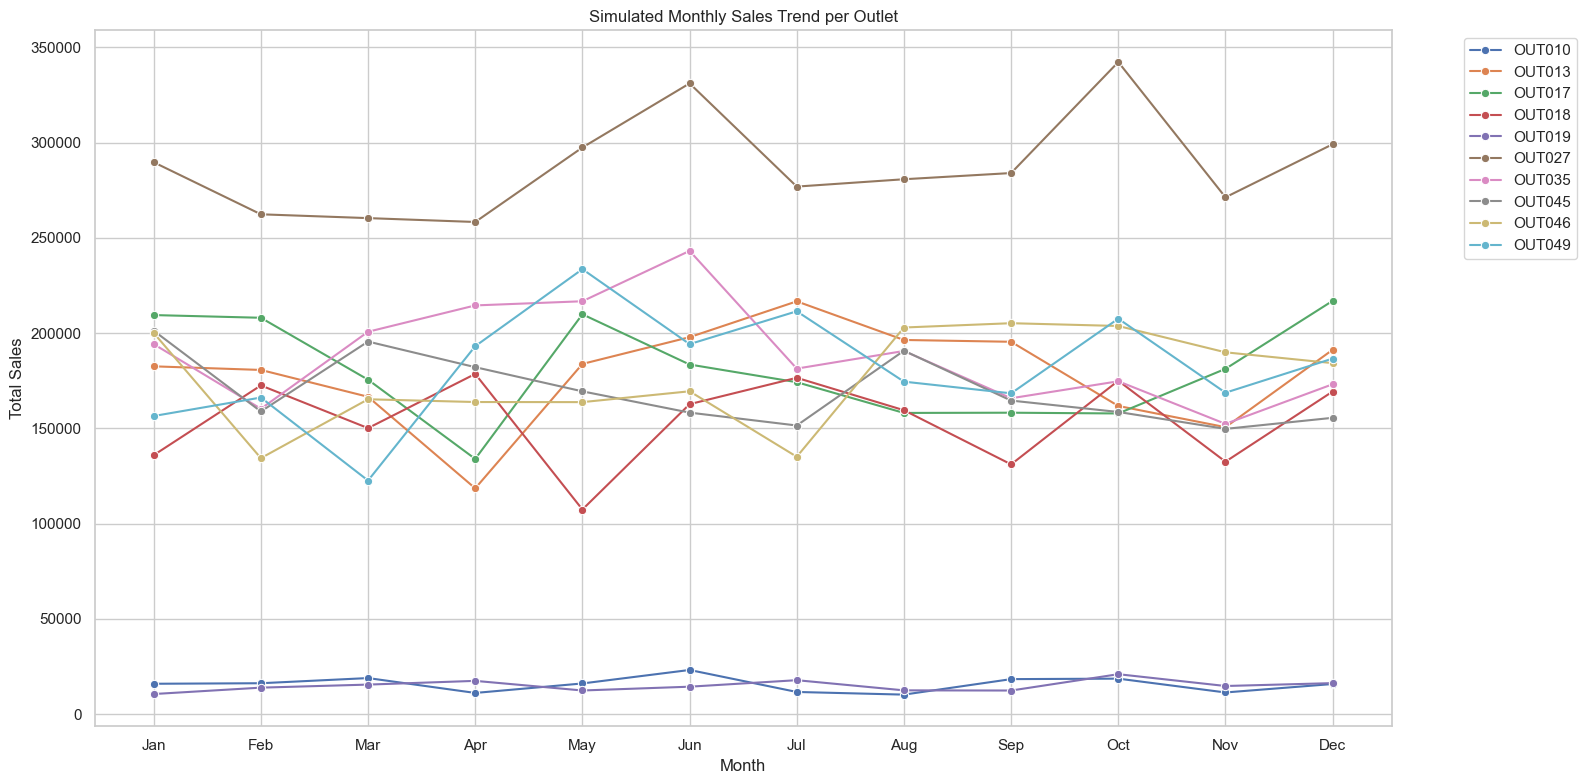

In [56]:
# Simulate monthly sales by randomly assigning a month to each entry
np.random.seed(42)  # For reproducibility
df['Month'] = np.random.choice(
    ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    size=len(df)
)

# Aggregate sales per outlet per month
monthly_sales = df.groupby(['Outlet_Identifier', 'Month'])['Item_Outlet_Sales'].sum().reset_index()

# To maintain chronological month order
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_sales['Month'] = pd.Categorical(monthly_sales['Month'], categories=month_order, ordered=True)
monthly_sales = monthly_sales.sort_values(by=['Outlet_Identifier', 'Month'])

# Plotting
plt.figure(figsize=(16, 8))
sns.lineplot(data=monthly_sales, x='Month', y='Item_Outlet_Sales', hue='Outlet_Identifier', marker='o')
plt.title("Simulated Monthly Sales Trend per Outlet")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

---
## 🔷 Scenario 3: Price Band Segmentation

### Problem Statement
Segment items into price bands and analyze sales pattern.

### 🧠 Instructions:
1. Use `pd.cut()` or `pd.qcut()` to create bands
2. Analyze sales by band
3. Create a boxplot

### ✍️ Your Task:

In [63]:
# TODO: Write code to segment price bands and compare sales across bands

C:\Users\YOSHVA.J\AppData\Local\Temp\ipykernel_9652\2839750338.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  band_sales_summary = df.groupby('Price_Band')['Item_Outlet_Sales'].describe()
C:\Users\YOSHVA.J\AppData\Local\Temp\ipykernel_9652\2839750338.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Price_Band', y='Item_Outlet_Sales', palette='viridis')


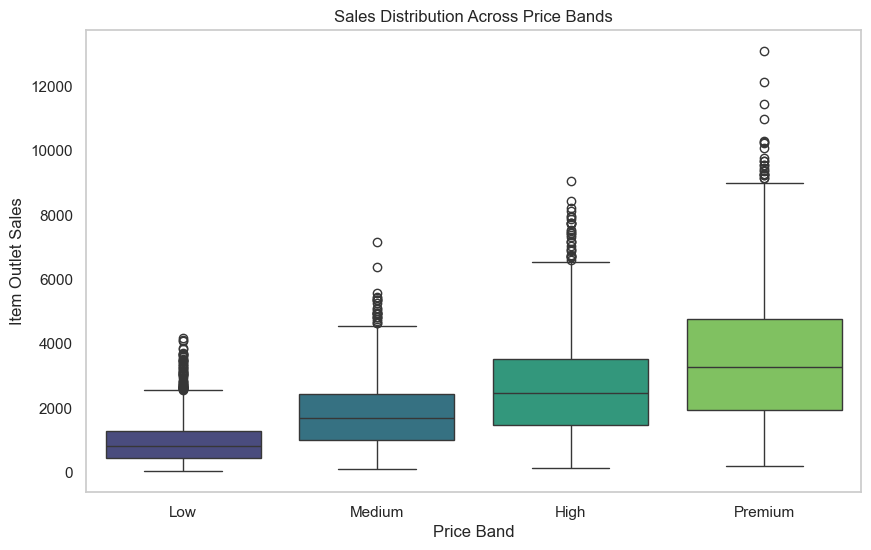

Sales Summary by Price Band:
             count         mean          std       min         25%        50%  \
Price_Band                                                                      
Low         2131.0   948.780309   680.844345   33.2900   460.40070   810.9444   
Medium      2131.0  1757.214603  1064.861042   93.8778   998.70000  1685.8056   
High        2130.0  2576.221513  1554.542287  143.1470  1468.58835  2479.4392   
Premium     2131.0  3443.124556  2046.873314  185.7582  1923.82910  3285.7230   

                  75%         max  
Price_Band                         
Low         1299.3087   4189.2136  
Medium      2422.8462   7158.6816  
High        3515.4240   9069.5276  
Premium     4761.8016  13086.9648  


In [65]:
# Step 1: Segment into price bands using pd.qcut (quartiles)
df['Price_Band'] = pd.qcut(df['Item_MRP'], q=4, labels=['Low', 'Medium', 'High', 'Premium'])

# Step 2: Group by Price Band and analyze sales
band_sales_summary = df.groupby('Price_Band')['Item_Outlet_Sales'].describe()

# Step 3: Create a boxplot to visualize sales distribution per price band
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Price_Band', y='Item_Outlet_Sales', palette='viridis')
plt.title("Sales Distribution Across Price Bands")
plt.xlabel("Price Band")
plt.ylabel("Item Outlet Sales")
plt.grid(axis='y')
plt.show()

# Optionally: print summary
print("Sales Summary by Price Band:")
print(band_sales_summary)

---
## 🔷 Scenario 4: Stock Optimization Strategy

### Problem Statement
Evaluate items with high stock (weight) but low sales.

### 🧠 Instructions:
1. Use `Item_Weight` to simulate stock volume
2. Plot weight vs. sales as scatter

### ✍️ Your Task:

In [72]:
# TODO: Identify overstocked items with low sales and plot scatter plot

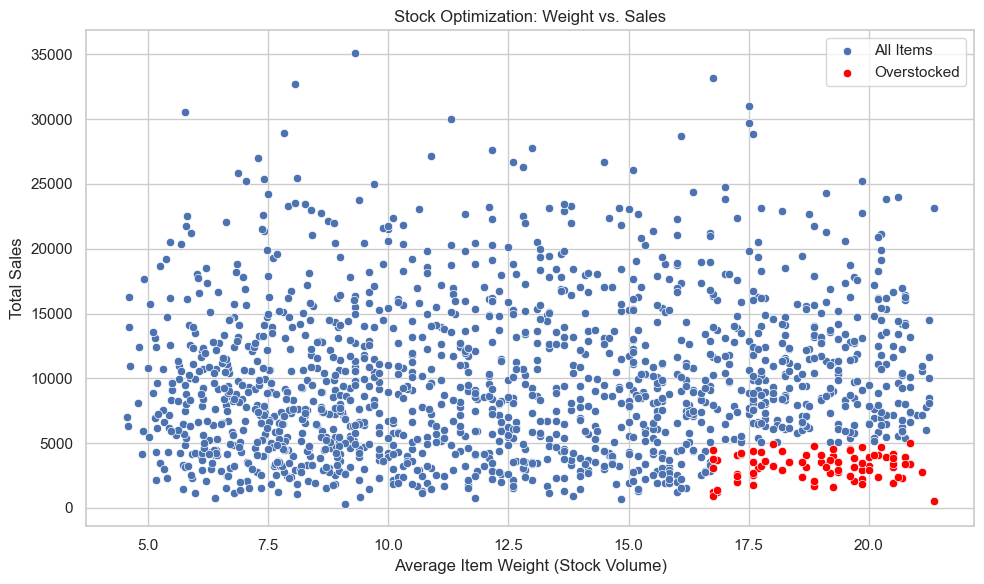

Overstocked Items (High Weight, Low Sales):
   Item_Identifier  Item_Weight  Item_Outlet_Sales
7            DRB48        16.75          3064.0116
27           DRE03        19.60          4538.0928
38           DRF03        19.10          3289.7178
40           DRF15        18.35          3522.0820
65           DRH03        17.25          4101.3280


In [74]:
# Step 1: Drop rows with missing Item_Weight
df_clean = df.dropna(subset=['Item_Weight'])

# Step 2: Aggregate total sales and average weight per item
stock_data = df_clean.groupby('Item_Identifier').agg({
    'Item_Weight': 'mean',       # Assuming mean weight represents stock volume
    'Item_Outlet_Sales': 'sum'   # Total sales across all outlets
}).reset_index()

# Step 3: Identify overstocked items: high weight but low sales
weight_75 = stock_data['Item_Weight'].quantile(0.75)
sales_25 = stock_data['Item_Outlet_Sales'].quantile(0.25)
overstocked_items = stock_data[
    (stock_data['Item_Weight'] >= weight_75) & 
    (stock_data['Item_Outlet_Sales'] <= sales_25)
]

# Step 4: Scatter Plot: Weight vs Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(data=stock_data, x='Item_Weight', y='Item_Outlet_Sales', label='All Items')
sns.scatterplot(data=overstocked_items, x='Item_Weight', y='Item_Outlet_Sales', color='red', label='Overstocked')
plt.title("Stock Optimization: Weight vs. Sales")
plt.xlabel("Average Item Weight (Stock Volume)")
plt.ylabel("Total Sales")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: print overstocked items
print("Overstocked Items (High Weight, Low Sales):")
print(overstocked_items.head())

---
## 🔷 Scenario 5: Correlation with Revenue

### Problem Statement
Find features highly correlated with sales.

### 🧠 Instructions:
1. Use `df.corr()`
2. Visualize heatmap
3. List top 3 positive correlations

### ✍️ Your Task:

In [80]:
# TODO: Write code to calculate and visualize correlations with sales

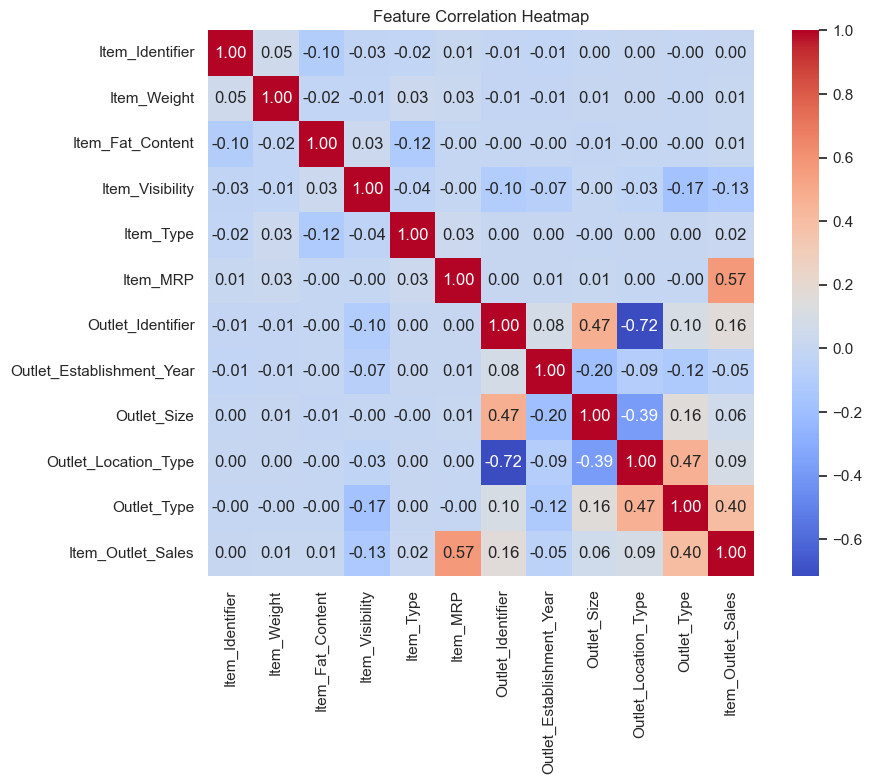

Top 3 features positively correlated with Item_Outlet_Sales:
Item_MRP             0.567574
Outlet_Type          0.401522
Outlet_Identifier    0.162325
Name: Item_Outlet_Sales, dtype: float64


In [97]:
# Step 1: Encode categorical variables numerically (for correlation)
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

# Step 2: Compute correlation matrix
correlation_matrix = df_encoded.corr()

# Step 3: Extract correlation of features with sales
sales_corr = correlation_matrix['Item_Outlet_Sales'].sort_values(ascending=False)

# Step 4: Plot heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

# Step 5: Print top 3 positively correlated features (excluding self-correlation)
top_3_corr = sales_corr.drop('Item_Outlet_Sales').head(3)

print("Top 3 features positively correlated with Item_Outlet_Sales:")
print(top_3_corr)